# *Traffic Sign Recognizer - 99% accuracy*

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn import metrics
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

## Assigning Path for Dataset

In [2]:
# data_dir = '../input/gtsrb-german-traffic-sign'
# train_path = '../input/gtsrb-german-traffic-sign/Train'
# test_path = '../input/gtsrb-german-traffic-sign/'

# Resizing the images to 32x32x3
IMG_HEIGHT = 32
IMG_WIDTH = 32
channels = 3

## Finding Total Classes

## Collecting the Training Data

In [2]:
# Opening file for reading in binary mode
import pickle
with open('D:\Project\Traffic Sign Detection\DATABASE/data3.pickle', 'rb') as f:
    image_data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
image_data['x_train'] = image_data['x_train'].transpose(0, 2, 3, 1)
image_data['x_validation'] = image_data['x_validation'].transpose(0, 2, 3, 1)
image_data['x_test'] = image_data['x_test'].transpose(0, 2, 3, 1)


X_test = image_data['x_test']
# ind = np.random.choice(X_test.shape[0],3657)
X_test = X_test#[ind]
y_test = image_data['y_test']#[ind]


In [3]:
with open('D:\Project\Traffic Sign Detection\DATABASE/data8.pickle', 'rb') as f:
    gray_data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
gray_data['x_train'] = gray_data['x_train'].transpose(0, 2, 3, 1)
gray_data['x_validation'] = gray_data['x_validation'].transpose(0, 2, 3, 1)
gray_data['x_test'] = gray_data['x_test'].transpose(0, 2, 3, 1)


gray_test_imgs = gray_data['x_test']#[ind]

gray_test_labels = gray_data['y_test']#[ind]


In [4]:
# gray_train_labels[gray_train_labels <= 10] = 0 #cycle
# gray_train_labels[gray_train_labels >= 32] = 0 #cycle
# gray_train_labels[(gray_train_labels == 15) |(gray_train_labels == 16)| (gray_train_labels ==17)] = 0 #cycle
# gray_train_labels[(gray_train_labels >= 18) & (gray_train_labels <= 31)] = 1 #triangle
# gray_train_labels[(gray_train_labels == 13) | (gray_train_labels == 11)] = 1 #triangle
# gray_train_labels[gray_train_labels == 14] = 2 # 6
# gray_train_labels[gray_train_labels == 12] = 3 # 4


gray_test_labels[gray_test_labels <= 10] = 0 #cycle
gray_test_labels[gray_test_labels >= 32] = 0 #cycle
gray_test_labels[(gray_test_labels == 15) |(gray_test_labels == 16)| (gray_test_labels ==17)] = 0 #cycle
gray_test_labels[(gray_test_labels >= 18) & (gray_test_labels <= 31)] = 1 #triangle
gray_test_labels[(gray_test_labels == 13) | (gray_test_labels == 11)] = 1 #triangle
gray_test_labels[gray_test_labels == 14] = 2 # 6
gray_test_labels[gray_test_labels == 12] = 3 # 4

# gray_valid_labels[gray_valid_labels <= 10] = 0 #cycle
# gray_valid_labels[gray_valid_labels >= 32] = 0 #cycle
# gray_valid_labels[(gray_valid_labels == 15) |(gray_valid_labels == 16)| (gray_valid_labels ==17)] = 0 #cycle
# gray_valid_labels[(gray_valid_labels >= 18) & (gray_valid_labels <= 31)] = 1 #triangle
# gray_valid_labels[(gray_valid_labels == 13) | (gray_valid_labels == 11)] = 1 #triangle
# gray_valid_labels[gray_valid_labels == 14] = 2 # 6
# gray_valid_labels[gray_valid_labels == 12] = 3 # 4

In [5]:

# gray_x_train = gray_train_imgs
gray_x_test = gray_test_imgs
# gray_x_valid = gray_valid_imgs

# # Normalization
# x_train = x_train / 255
# x_test = x_test / 255

num_class_shape = 4

# One Hot Encoding
# gray_y_train = keras.utils.to_categorical(gray_train_labels, num_class_shape)
gray_y_test = keras.utils.to_categorical(gray_test_labels, num_class_shape)
# gray_y_valid = keras.utils.to_categorical(gray_valid_labels, num_class_shape)



In [6]:
y_test = image_data['y_test']


In [7]:
tri_Dict = {0:11 , 1:13 , 2:18 , 3:19 , 4:20 , 5:21 , 6:22 , 7:23 , 8:24 , 9:25 , 10:26 , 11:27 , 12:28 , 13:29 , 14:30 , 15:31 }


In [8]:
cy_Dict = {0:0 ,1:1 ,2:2, 3:3 , 4:4 , 5:5 , 6:6 , 7:7 , 8:8 , 9:9 ,10:10 ,11:15 , 12:16 , 13:17 , 14:32 , 15:33 , 16:34 , 17:35 , 18:36 , 19:37 , 20:38 , 21:39 , 22:40 , 23:41 , 24:42 }



## Ensemble Model

In [9]:
cy_model = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\circle_classifier_model_acc98.h5')
tri_model = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\tri_classifier_model_acc96.h5')
shape_classifier = load_model( "D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\shape_classifier_model (2).h5")

In [10]:
scores = shape_classifier.evaluate(gray_x_test,gray_y_test)

395/395 [==============================] - 6s 5ms/step - loss: 0.0764 - accuracy: 0.9915


In [11]:
predictions = shape_classifier.predict(gray_x_test)
predictions = (predictions > 0.5).astype("int32")


395/395 [==============================] - 2s 3ms/step


In [12]:
pred = np.zeros((y_test.shape))
cir_indx = np.where(predictions[:,0] == 1)
cir_pred = cy_model.predict(X_test[cir_indx]).argmax(axis=-1)
cir_pred = np.vectorize(cy_Dict.get)(cir_pred)
pred[cir_indx] = cir_pred

tri_indx = np.where(predictions[:,1] == 1)
tri_pred = tri_model.predict(X_test[tri_indx]).argmax(axis=-1)
tri_pred = np.vectorize(tri_Dict.get)(tri_pred)
pred[tri_indx] = tri_pred
for i , j in [12 , 3] , [14 , 2]:
    rec_indx = np.where(predictions[:,j] == 1)
    pred[rec_indx] = i

111/111 [==============================] - 1s 4ms/step


In [13]:
cr = classification_report(y_test, pred ,output_dict = False)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.97      0.99      0.98       720
           2       0.97      0.98      0.98       750
           3       0.95      0.98      0.96       450
           4       0.99      0.97      0.98       660
           5       0.97      0.96      0.96       630
           6       1.00      0.82      0.90       150
           7       0.99      0.98      0.99       450
           8       0.99      0.99      0.99       450
           9       0.98      1.00      0.99       480
          10       0.99      0.98      0.99       660
          11       0.90      0.97      0.94       420
          12       1.00      0.95      0.97       690
          13       0.99      0.99      0.99       720
          14       0.95      0.91      0.93       270
          15       0.98      1.00      0.99       210
          16       0.97      0.99      0.98       150
          17       0.95    

In [14]:
acc = accuracy_score(y_test, pred )
print(acc)

0.9699129057798892


In [15]:
cr = classification_report(y_test, pred ,output_dict = True)
a = np.zeros((43))
for i in range(0 , 43):
    a[i] = cr[str(i)]['support']

In [16]:
print(cr['weighted avg'])

{'precision': 0.970957948824871, 'recall': 0.9699129057798892, 'f1-score': 0.9697775022560239, 'support': 12630}


In [17]:
for i in a:
    print(round(i))

60
720
750
450
660
630
150
450
450
480
660
420
690
720
270
210
150
360
390
60
90
90
120
150
90
480
180
60
150
90
150
270
60
210
120
390
120
60
690
90
90
60
90


<AxesSubplot: >

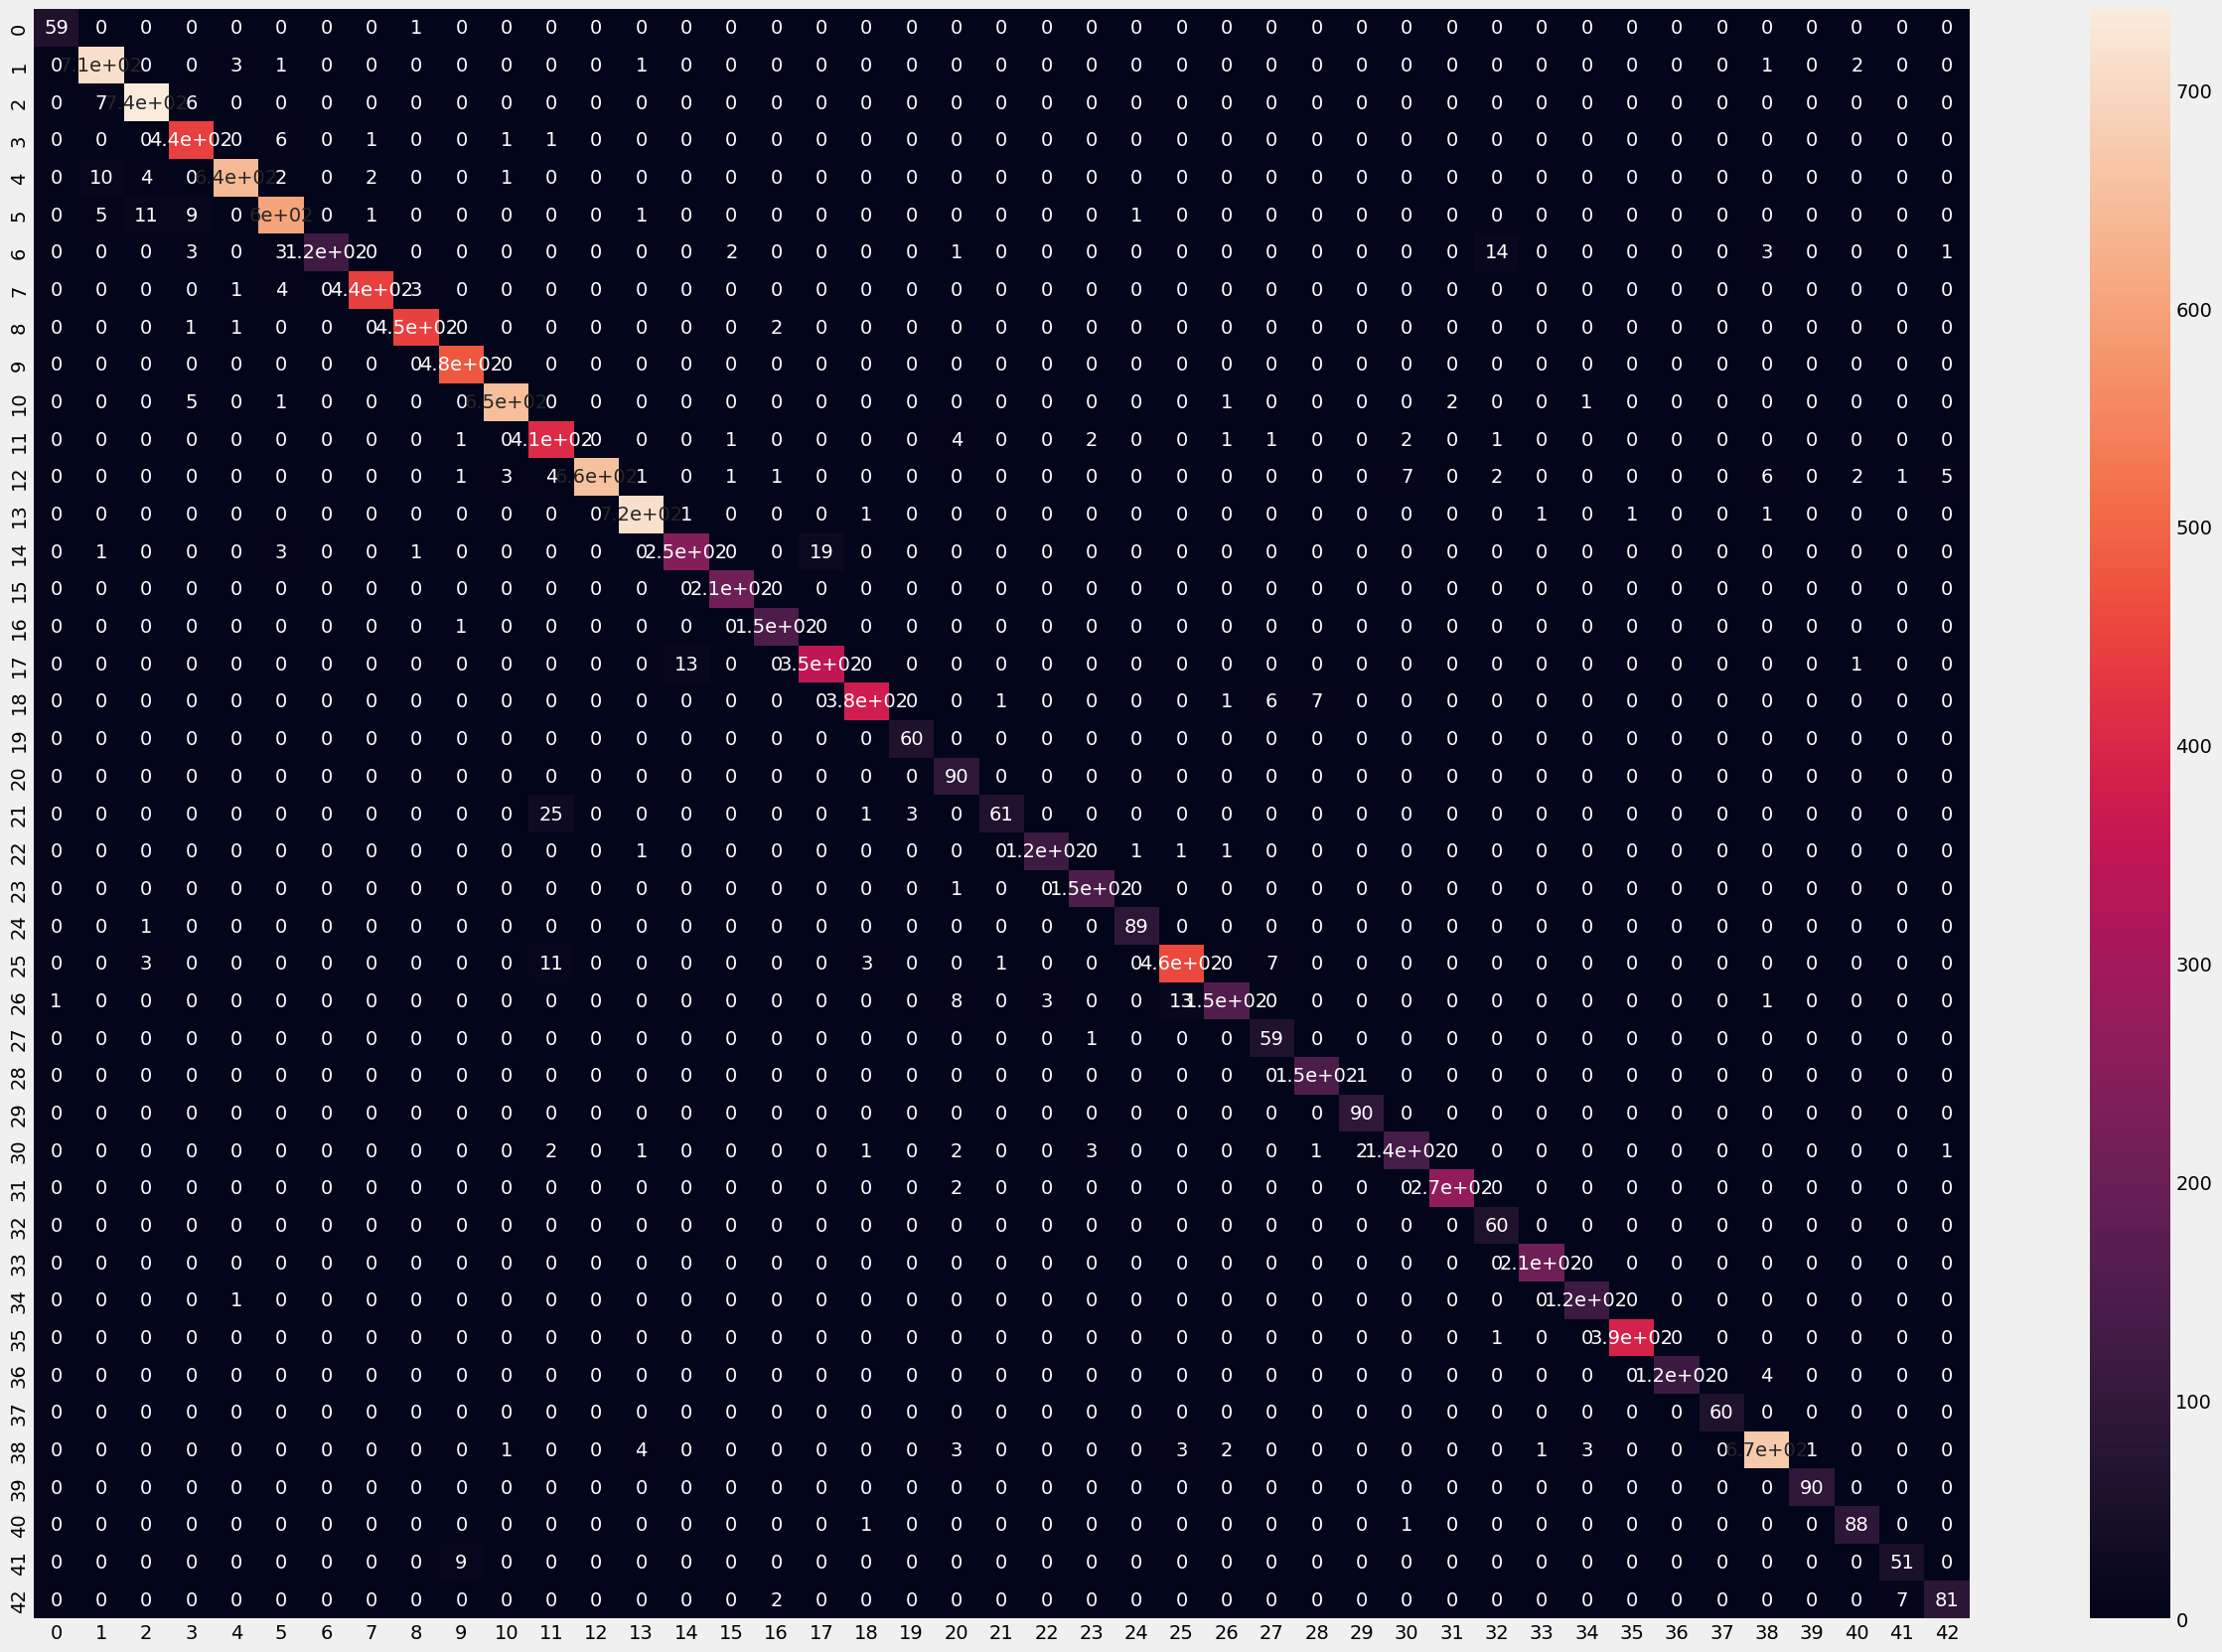

In [18]:
from seaborn import heatmap

cm = confusion_matrix(y_test , pred)
plt.figure(figsize=(28,20))
heatmap(cm,annot=True, fmt='.2g')

In [18]:
TP = acc_per_class * num_per_class

prohibitory_indx = np.array([0 , 1 , 2 , 3 , 4 , 5 , 7 , 8 , 9 , 10 , 15 , 16])
danger_indx = np.array([11 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , 25, 26, 27, 28 , 29 , 30 , 31])
mandatory_indx = range(33 , 40)
other_indx = np.array([41 , 32 ,17 , 14 , 13 , 12 , 6])

prohibitory = TP[prohibitory_indx].sum()
danger = TP[danger_indx].sum()
mandatory = TP[mandatory_indx].sum()
other = TP[other_indx].sum()

num_prohibitory = num_per_class[prohibitory_indx].sum()
num_danger = num_per_class[danger_indx].sum()
num_mandatory = num_per_class[mandatory_indx].sum()
num_other = num_per_class[other_indx].sum()

NameError: name 'acc_per_class' is not defined

In [25]:
acc_prohibitory = prohibitory/num_prohibitory
acc_danger = danger/num_danger
acc_mandatory = mandatory/num_mandatory
acc_other = other/num_other

print(acc_prohibitory , acc_danger, acc_mandatory ,acc_other)

0.981657848324515 0.9530465949820789 0.9857142857142858 0.9510822510822511


## Classification Reaport

In [50]:
a = classification_report(cy_labels, cy_class , output_dict = True)
b = classification_report(tri_labels, tri_class , output_dict = True)
c = classification_report(predictions , gray_y_test , output_dict = True)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
reaport = np.zeros((43 , 4))
for i in range(0 , 43):
    try:
        ii = tri_Dict[i]
        dic = b[str(ii)]
        reaport[i,:]= np.array([dic["precision"] , dic["recall"] , dic["f1-score"] , dic["support"]])

    except:
        try:
            ii = cy_Dict[i]
            dic = a[str(ii)]
            reaport[i,:]= np.array([dic["precision"] , dic["recall"] , dic["f1-score"] , dic["support"]])
        except:
            if(i == 12):
                dic = c["3"]
                reaport[i,:]= np.array([dic["precision"] , dic["recall"] , dic["f1-score"] , dic["support"]])
            else :
                dic = c["2"]
                reaport[i,:]= np.array([dic["precision"] , dic["recall"] , dic["f1-score"] , dic["support"]])

In [81]:
for i in range(0 , 43):
    print(reaport[i , 0], "\t",reaport[i , 1],"\t",reaport[i , 2],"\t",reaport[i , 3])
    print("\n")

1.0 	 0.9833333333333333 	 0.9915966386554621 	 60.0


0.9700272479564033 	 0.9902642559109874 	 0.9800412938747419 	 719.0


0.9800266311584553 	 0.9813333333333333 	 0.9806795469686875 	 750.0


0.9504310344827587 	 0.9821826280623608 	 0.9660460021905805 	 449.0


0.990726429675425 	 0.9712121212121212 	 0.9808722264728386 	 660.0


0.9724919093851133 	 0.9570063694267515 	 0.9646869983948635 	 628.0


1.0 	 0.825503355704698 	 0.9044117647058824 	 149.0


0.9910112359550561 	 0.98 	 0.9854748603351954 	 450.0


0.9911111111111112 	 0.9911111111111112 	 0.9911111111111112 	 450.0


0.9795918367346939 	 1.0 	 0.9896907216494846 	 480.0


0.9954058192955589 	 0.989345509893455 	 0.9923664122137404 	 657.0


0.9146067415730337 	 0.9760191846522782 	 0.9443155452436194 	 417.0


0.9507246376811594 	 1.0 	 0.974739970282318 	 656.0


0.99721059972106 	 0.9986033519553073 	 0.9979064898813679 	 716.0


0.9111111111111111 	 0.9461538461538461 	 0.9283018867924527 	 260.0


0.99056603773584

In [161]:
def mul_sup(a):
    for i in range(0 , 3):
        a[:,i] *= a[:,3]
    a = a.sum(axis = 0)
    for i in range(0,3):
        a[i] /= a[3]
        a[i] = round(a[i],4) * 100
    return a

In [162]:
prohibitory = mul_sup(reaport[prohibitory_indx,:])
danger = mul_sup(reaport[danger_indx,:])
mandatory = mul_sup(reaport[mandatory_indx,:])
other = mul_sup(reaport[other_indx,:])

In [171]:
print("               pre    recall   f1_score sup")
print("prohibitory",prohibitory)
print("danger     ",danger)
print("mandatory  ",mandatory)
print("other      ",other)

               pre    recall   f1_score sup
prohibitory [  98.08   98.29   98.17 5663.  ]
danger      [  95.97   95.61   95.62 2780.  ]
mandatory   [  99.17   99.28   99.22 1668.  ]
other       [  96.62   97.73   97.07 2248.  ]
